<a href="https://colab.research.google.com/github/RodrigodeFeo/8DTS/blob/main/FE_Trabalho_Integrado_RM351578.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Para podermos iniciar a analise do Dataset de Clientes devemos realizar a leitura da base de dados.

In [2]:
#Realizando o import das bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [3]:
#Agora vamos criar uma funcao para poder realizar o upload do arquivo no Colab
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('Arquivo "{name}" importado pelo usuário com tamanho de {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving dataset.txt to dataset.txt
Arquivo "dataset.txt" importado pelo usuário com tamanho de 8394946 bytes


In [4]:
#Como nao sabemos qual o enconde o arquivo foi gerado vamos investigar
import chardet
# Abre o arquivo em modo de leitura binária
with open('dataset.txt', 'rb') as arquivo:
    # Lê uma quantidade de bytes do arquivo para análise
    dados = arquivo.read()
    # Detecta o encoding dos dados
    resultado = chardet.detect(dados)

# Exibe o resultado
print("Encoding do arquivo:", resultado['encoding'])

Encoding do arquivo: ISO-8859-1


In [5]:
#Vamos agora ler os dados do arquivo importado com o encoding ISO-8859-1
df_clientes = pd.read_csv('dataset.txt',delimiter='\t',encoding='ISO-8859-1',header=None)

<ipython-input-5-d55eb56d76ea>:2: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df_clientes = pd.read_csv('dataset.txt',delimiter='\t',encoding='ISO-8859-1',header=None)


In [6]:
#Vamos verificar uma amostra dos dados para identificar se a leitura foi realizada de forma correta
df_clientes.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,1,C,5,Web,0,1,F,6,1,0,...,0,0,0,0,1,N,32,595,595,1
1,2,C,15,Carga,0,1,F,2,0,0,...,0,0,0,0,1,N,34,230,230,1
2,3,C,5,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,27,591,591,0
3,4,C,20,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,61,545,545,0
4,5,C,10,Web,0,1,M,2,0,0,...,0,0,0,0,1,N,48,235,235,1


Neste ponto ja obtivemos acesso aos dados da nossa base de dados de clientes.
Ao visualizar um trecho das amostras ja identificamos o primeiro ponto a se tratar, as variaveis estao sem rotulos. Recebemos um segundo arquivo com o descritivo das variaveis. Agora vamos realizar o carregamento deste arquivo e setar os rotulos no nosso data frame de clientes.

In [7]:
#Lendo o arquivo de descritivo de rotulos das variaveis
uploaded = files.upload()

for fn in uploaded.keys():
  print('Arquivo "{name}" importado pelo usuário com tamanho de {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving descritivo_características.xlsx to descritivo_características.xlsx
Arquivo "descritivo_características.xlsx" importado pelo usuário com tamanho de 13768 bytes


In [8]:
#Criando o Dataframe com os rotulos
df_descritivo_rotulos_clientes = pd.read_excel('descritivo_características.xlsx')

In [9]:
#Vamos verificar os dados
df_descritivo_rotulos_clientes.head()

,Var_Id,Característica,Descrição
0,1,ID_CLIENTE,Número sequencial para o requerente (a ser usa...
1,2,TIPO_FUNCIONARIO,Não informado
2,3,DIA_PAGAMENTO,"Dia do mês para o pagamento da fatura, escolhi..."
3,4,TIPO_ENVIO_APLICACAO,Indica se a aplicação foi submetida via intern...
4,5,QUANT_CARTOES_ADICIONAIS,Quantidade de cartões adicionais solicitados n...


Apos avaliar os dados dos descritivos identificamos que o rotulo das nossas variaveis estao descritas na coluna Caracteristica do arquivo descritivo dos dados, vamos entao separala em um novo dataframe, realizar o pivot dos dados e realizar um append na primeira linha do nosso data frame de clientes.

In [10]:
#Separando apenas as colunas que identificam os rotulos
df_rotulos = df_descritivo_rotulos_clientes['Característica']
df_rotulos.head()

0                  ID_CLIENTE
1            TIPO_FUNCIONARIO
2               DIA_PAGAMENTO
3        TIPO_ENVIO_APLICACAO
4    QUANT_CARTOES_ADICIONAIS
Name: Característica, dtype: object

In [11]:
#Vamos agora transformar a coluna caracteristica nos rotulos das colunas
# porem primeiro vamos transformar os rotulos em um data frame
import pandas as pd
df_rotulos = pd.DataFrame(df_rotulos)
df_rotulos.head()

,Característica
0,ID_CLIENTE
1,TIPO_FUNCIONARIO
2,DIA_PAGAMENTO
3,TIPO_ENVIO_APLICACAO
4,QUANT_CARTOES_ADICIONAIS


In [12]:
 #Pronto agora apenas vamos setar os rotulos das colunas no dataframe de clientes
df_clientes = df_clientes.rename(columns= df_rotulos['Característica'])
df_clientes.head()


,ID_CLIENTE,TIPO_FUNCIONARIO,DIA_PAGAMENTO,TIPO_ENVIO_APLICACAO,QUANT_CARTOES_ADICIONAIS,TIPO_ENDERECO_POSTAL,SEXO,ESTADO_CIVIL,QUANT_DEPENDENTES,NIVEL_EDUCACIONAL,...,FLAG_DOCUMENTO_RESIDENCIAL,FLAG_RG,FLAG_CPF,FLAG_COMPROVANTE_RENDA,PRODUTO,FLAG_REGISTRO_ACSP,IDADE,CEP_RESIDENCIAL_3,CEP_PROFISSIONAL_3,ROTULO_ALVO_MAU=1
0,1,C,5,Web,0,1,F,6,1,0,...,0,0,0,0,1,N,32,595,595,1
1,2,C,15,Carga,0,1,F,2,0,0,...,0,0,0,0,1,N,34,230,230,1
2,3,C,5,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,27,591,591,0
3,4,C,20,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,61,545,545,0
4,5,C,10,Web,0,1,M,2,0,0,...,0,0,0,0,1,N,48,235,235,1


Agora temos nossos dados carregados e rotulados, vamos iniciar a analise das features

Vamos iniciar a analise pela nossa variavel alvo que nos informa se o cliente e bom ou mau pagador, na nossa base o rotulo e ROTULO_ALVO_MAU=1 sendo o valor 1 para mau pagador e 0 para bom pagador.
Primeiro vamos verificar se realmente tratase de uma feature binaria

<ipython-input-13-fbce98a5c1ea>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ROTULO_ALVO_MAU=1',data=df_clientes,palette='hls')


<Axes: xlabel='ROTULO_ALVO_MAU=1', ylabel='count'>

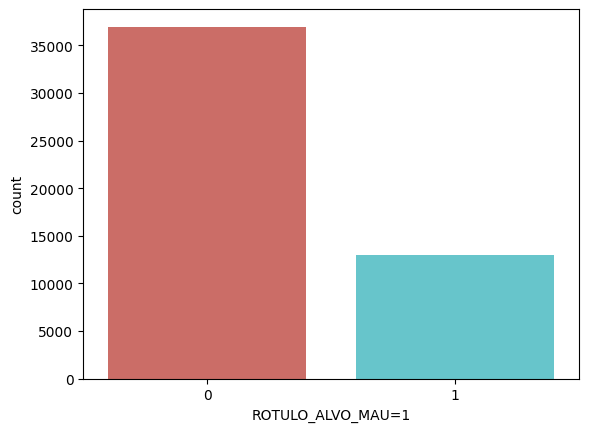

In [13]:
#Vamos plotar um contplot para verificar se a variavel e binaria e sua distribuicao
sns.countplot(x='ROTULO_ALVO_MAU=1',data=df_clientes,palette='hls')

Na sequencia vamos verificar a incidencia de nulos na nossa base

In [14]:
#Verificando os nan na base de clientes
df_clientes.isnull().sum()

ID_CLIENTE                               0
TIPO_FUNCIONARIO                         0
DIA_PAGAMENTO                            0
TIPO_ENVIO_APLICACAO                     0
QUANT_CARTOES_ADICIONAIS                 0
TIPO_ENDERECO_POSTAL                     0
SEXO                                     0
ESTADO_CIVIL                             0
QUANT_DEPENDENTES                        0
NIVEL_EDUCACIONAL                        0
ESTADO_NASCIMENTO                        0
CIDADE_NASCIMENTO                        0
NACIONALIDADE                            0
ESTADO_RESIDENCIAL                       0
CIDADE_RESIDENCIAL                       0
BAIRRO_RESIDENCIAL                       0
FLAG_TELEFONE_RESIDENCIAL                0
CODIGO_AREA_TELEFONE_RESIDENCIAL         0
TIPO_RESIDENCIA                       1349
MESES_RESIDENCIA                      3777
FLAG_TELEFONE_MOVEL                      0
FLAG_EMAIL                               0
RENDA_PESSOAL_MENSAL                     0
OUTRAS_REND

In [15]:
#Vamos tambem verificar o tipo das features da base
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 54 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID_CLIENTE                         50000 non-null  int64  
 1   TIPO_FUNCIONARIO                   50000 non-null  object 
 2   DIA_PAGAMENTO                      50000 non-null  int64  
 3   TIPO_ENVIO_APLICACAO               50000 non-null  object 
 4   QUANT_CARTOES_ADICIONAIS           50000 non-null  int64  
 5   TIPO_ENDERECO_POSTAL               50000 non-null  int64  
 6   SEXO                               50000 non-null  object 
 7   ESTADO_CIVIL                       50000 non-null  int64  
 8   QUANT_DEPENDENTES                  50000 non-null  int64  
 9   NIVEL_EDUCACIONAL                  50000 non-null  int64  
 10  ESTADO_NASCIMENTO                  50000 non-null  object 
 11  CIDADE_NASCIMENTO                  50000 non-null  obj

Vamos iniciar removendo todas as variaveis que consideramos nao sao relevantes para nosso modelo

In [16]:
#Removendo as features que nao sao relevantes para o modelo
df_clientes_rev = df_clientes
df_clientes_rev = df_clientes_rev.drop(['ID_CLIENTE'],axis=1)
df_clientes_rev = df_clientes_rev.drop(['TIPO_ENVIO_APLICACAO'],axis=1)
df_clientes_rev = df_clientes_rev.drop(['TIPO_ENDERECO_POSTAL'],axis=1)
df_clientes_rev = df_clientes_rev.drop(['FLAG_TELEFONE_RESIDENCIAL'],axis=1)
df_clientes_rev = df_clientes_rev.drop(['CODIGO_AREA_TELEFONE_RESIDENCIAL'],axis=1)
df_clientes_rev = df_clientes_rev.drop(['ESTADO_RESIDENCIAL'],axis=1)
df_clientes_rev = df_clientes_rev.drop(['CIDADE_RESIDENCIAL'],axis=1)
df_clientes_rev = df_clientes_rev.drop(['BAIRRO_RESIDENCIAL'],axis=1)
df_clientes_rev = df_clientes_rev.drop(['ESTADO_PROFISSIONAL'],axis=1)
df_clientes_rev = df_clientes_rev.drop(['CIDADE_PROFISSIONAL'],axis=1)
df_clientes_rev = df_clientes_rev.drop(['BAIRRO_PROFISSIONAL'],axis=1)
df_clientes_rev = df_clientes_rev.drop(['FLAG_TELEFONE_PROFISSIONAL'],axis=1)
df_clientes_rev = df_clientes_rev.drop(['CODIGO_AREA_TELEFONE_PROFISSIONAL'],axis=1)
df_clientes_rev = df_clientes_rev.drop(['CEP_RESIDENCIAL_3'],axis=1)
df_clientes_rev = df_clientes_rev.drop(['CEP_PROFISSIONAL_3'],axis=1)
df_clientes_rev = df_clientes_rev.drop(['EMPRESA'],axis=1)
df_clientes_rev.head()

,TIPO_FUNCIONARIO,DIA_PAGAMENTO,QUANT_CARTOES_ADICIONAIS,SEXO,ESTADO_CIVIL,QUANT_DEPENDENTES,NIVEL_EDUCACIONAL,ESTADO_NASCIMENTO,CIDADE_NASCIMENTO,NACIONALIDADE,...,CODIGO_PROFISSAO_CONJUGE,NIVEL_EDUCACIONAL_CONJUGE,FLAG_DOCUMENTO_RESIDENCIAL,FLAG_RG,FLAG_CPF,FLAG_COMPROVANTE_RENDA,PRODUTO,FLAG_REGISTRO_ACSP,IDADE,ROTULO_ALVO_MAU=1
0,C,5,0,F,6,1,0,RN,Assu,1,...,NaN,NaN,0,0,0,0,1,N,32,1
1,C,15,0,F,2,0,0,RJ,rio de janeiro,1,...,11.0,NaN,0,0,0,0,1,N,34,1
2,C,5,0,F,2,0,0,RN,GARANHUNS,1,...,NaN,NaN,0,0,0,0,1,N,27,0
3,C,20,0,F,2,0,0,PE,CABO,1,...,NaN,NaN,0,0,0,0,1,N,61,0
4,C,10,0,M,2,0,0,RJ,RIO DE JANEIRO,1,...,NaN,NaN,0,0,0,0,1,N,48,1


Identificamos que as features abaixo contem valores nulos
> TIPO_RESIDENCIA                       1349

> MESES_RESIDENCIA                      3777

> CIDADE_PROFISSIONAL                  33783

> BAIRRO_PROFISSIONAL                  33783

> CODIGO_PROFISSAO                      7756

> TIPO_OCUPACAO                         7313

> CODIGO_PROFISSAO_CONJUGE             28884

> NIVEL_EDUCACIONAL_CONJUGE            32338

Vamos iniciar o tratamento idividual de cada uma delas

As features

CIDADE_PROFISSIONAL 33783

BAIRRO_PROFISSIONAL 33783

Foram removidas pois possuiam nulos e nao eram relavantes para o modelo


Vamos iniciar a analise da feature TIPO_RESIDENCIA

In [17]:
#Visualisando os dados
df_clientes_rev.TIPO_RESIDENCIA.info()

<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: TIPO_RESIDENCIA
Non-Null Count  Dtype  
--------------  -----  
48651 non-null  float64
dtypes: float64(1)
memory usage: 390.8 KB


In [18]:
#Vamos verificar quais diferentes tipos de dados temos na feature
df_clientes_rev.TIPO_RESIDENCIA.unique()

array([ 1., nan,  2.,  5.,  0.,  3.,  4.])

<ipython-input-19-cd611cc13aff>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TIPO_RESIDENCIA',y='IDADE',data=df_clientes_rev,palette='hls')


<Axes: xlabel='TIPO_RESIDENCIA', ylabel='IDADE'>

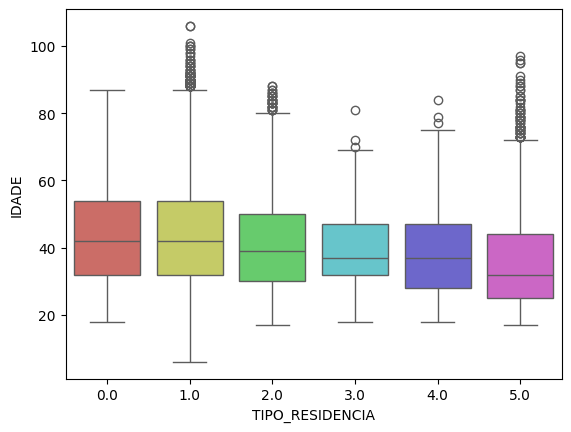

In [19]:
#Vamos agora ver como esses tipos se comportam em relacao a idade
sns.boxplot(x='TIPO_RESIDENCIA',y='IDADE',data=df_clientes_rev,palette='hls')


Analisando a distribuicao podemos verificar uma relacao da idade com om tipo do imovel, assim podemo entao distribuir os valores nulos do tipo de imovel pela faixa de idade

In [20]:
#Funcao para aplicar um valor para o tipo de residencia nula a depender da faixa de idade
def tres_approx(cols):
    Age = cols[0]
    Tres = cols[1]

    if pd.isnull(Tres):
        if Age <= 28:
            return 5
        elif Age > 28 and Age <= 30:
            return 4
        elif Age > 30 and Age <= 35:
            return 3
        elif Age > 35 and Age <= 38:
            return 2
        elif Age > 38 and Age <= 40:
            return 1
        else:
            return 0
    else:
        return Tres

In [21]:
#Vamos aplicar a funcao na nossa base revisada
df_clientes_rev['TIPO_RESIDENCIA'] = df_clientes_rev[['IDADE','TIPO_RESIDENCIA']].apply(tres_approx,axis=1)

#Verificando se nao existe mais nan no tipo de residencia
df_clientes_rev.isnull().sum()

TIPO_FUNCIONARIO                        0
DIA_PAGAMENTO                           0
QUANT_CARTOES_ADICIONAIS                0
SEXO                                    0
ESTADO_CIVIL                            0
QUANT_DEPENDENTES                       0
NIVEL_EDUCACIONAL                       0
ESTADO_NASCIMENTO                       0
CIDADE_NASCIMENTO                       0
NACIONALIDADE                           0
TIPO_RESIDENCIA                         0
MESES_RESIDENCIA                     3777
FLAG_TELEFONE_MOVEL                     0
FLAG_EMAIL                              0
RENDA_PESSOAL_MENSAL                    0
OUTRAS_RENDAS                           0
FLAG_VISA                               0
FLAG_MASTERCARD                         0
FLAG_DINERS                             0
FLAG_AMERICAN_EXPRESS                   0
FLAG_OUTROS_CARTOES                     0
QUANT_CONTAS_BANCARIAS                  0
QUANT_CONTAS_BANCARIAS_ESPECIAIS        0
VALOR_PATRIMONIO_PESSOAL          

In [22]:
df_clientes_rev.TIPO_RESIDENCIA.unique()

array([1., 0., 2., 5., 3., 4.])

Vamos avaliar agora a correlacao do tempo de residencia com o tipo de residencia para tentarmos identificar uma forma de classificar os nan sem enviesar nossa base

<ipython-input-23-80d635cf3f42>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TIPO_RESIDENCIA',y='MESES_RESIDENCIA',data=df_clientes_rev,palette='hls')


<Axes: xlabel='TIPO_RESIDENCIA', ylabel='MESES_RESIDENCIA'>

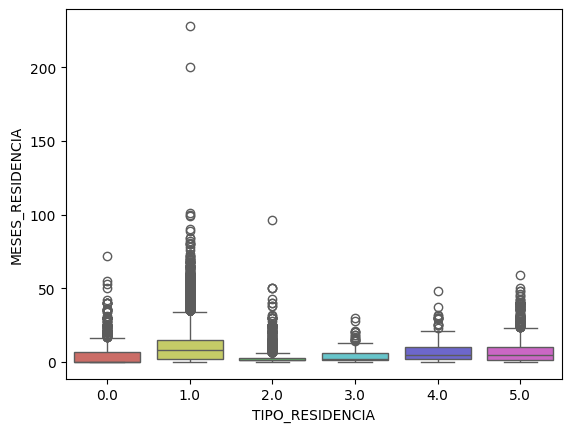

In [23]:
#Vamos agora ver como o tempo de residencia se comporta em relacao ao tipo
sns.boxplot(x='TIPO_RESIDENCIA',y='MESES_RESIDENCIA',data=df_clientes_rev,palette='hls')

Verificamos que o tempo de residencia tem alguma correlacao com o tempo de imovel entao vamos substituir os nan do tempo de residencia pela media de meses do tipo de residencia

In [24]:
#Funcao para aplicar um valor para o tipo de residencia nula a depender da faixa de idade
def mres_approx(cols):
    Mres = cols[0]
    Tres = cols[1]

    if pd.isnull(Mres):
        if Tres == 0:
            return 6
        elif Tres == 1:
            return 20
        elif Tres == 2:
            return 8
        elif Tres == 3:
            return 9
        elif Tres == 4:
            return 12
        else:
            return 15
    else:
        return Mres

In [25]:
#Vamos aplicar a funcao na nossa base revisada
df_clientes_rev['MESES_RESIDENCIA'] = df_clientes_rev[['MESES_RESIDENCIA','TIPO_RESIDENCIA']].apply(mres_approx,axis=1)

#Verificando se nao existe mais nan no tempo de residencia
df_clientes_rev.isnull().sum()

TIPO_FUNCIONARIO                        0
DIA_PAGAMENTO                           0
QUANT_CARTOES_ADICIONAIS                0
SEXO                                    0
ESTADO_CIVIL                            0
QUANT_DEPENDENTES                       0
NIVEL_EDUCACIONAL                       0
ESTADO_NASCIMENTO                       0
CIDADE_NASCIMENTO                       0
NACIONALIDADE                           0
TIPO_RESIDENCIA                         0
MESES_RESIDENCIA                        0
FLAG_TELEFONE_MOVEL                     0
FLAG_EMAIL                              0
RENDA_PESSOAL_MENSAL                    0
OUTRAS_RENDAS                           0
FLAG_VISA                               0
FLAG_MASTERCARD                         0
FLAG_DINERS                             0
FLAG_AMERICAN_EXPRESS                   0
FLAG_OUTROS_CARTOES                     0
QUANT_CONTAS_BANCARIAS                  0
QUANT_CONTAS_BANCARIAS_ESPECIAIS        0
VALOR_PATRIMONIO_PESSOAL          

In [26]:
df_clientes_rev.MESES_RESIDENCIA.unique()

array([ 15.,   1.,  20.,   6.,  12.,   4.,   0.,   5.,  10.,   2.,   3.,
        18.,  25.,  14.,  16.,   8.,   7.,   9.,  17.,  30.,  11.,  37.,
        22.,  33.,  26.,  40.,  32.,  29.,  23.,  13.,  36.,  45.,  60.,
        34.,  21.,  31.,  35.,  38.,  39.,  24.,  19.,  48.,  28.,  52.,
        49.,  46.,  27.,  42.,  62.,  51.,  82.,  44.,  68.,  71.,  50.,
        47.,  41.,  57.,  69.,  55., 200.,  53., 100.,  72.,  43.,  70.,
        54.,  56.,  80.,  65.,  90.,  58.,  96.,  64.,  76.,  84.,  73.,
        59., 228.,  63., 101.,  99.,  66.,  67.,  78.,  61.,  81.,  89.])

Agora para os campos
> CODIGO_PROFISSAO

> TIPO_OCUPACAO

> CODIGO_PROFISSAO_CONJUGE

> NIVEL_EDUCACIONAL_CONJUGE

Nao foram identificados relevancia para o modelo vamos apenas removelos

In [27]:
#Removendo as features que nao sao relevantes para o modelo
df_clientes_rev = df_clientes_rev
df_clientes_rev = df_clientes_rev.drop(['CODIGO_PROFISSAO'],axis=1)
df_clientes_rev = df_clientes_rev.drop(['TIPO_OCUPACAO'],axis=1)
df_clientes_rev = df_clientes_rev.drop(['CODIGO_PROFISSAO_CONJUGE'],axis=1)
df_clientes_rev = df_clientes_rev.drop(['NIVEL_EDUCACIONAL_CONJUGE'],axis=1)
df_clientes_rev.head()

,TIPO_FUNCIONARIO,DIA_PAGAMENTO,QUANT_CARTOES_ADICIONAIS,SEXO,ESTADO_CIVIL,QUANT_DEPENDENTES,NIVEL_EDUCACIONAL,ESTADO_NASCIMENTO,CIDADE_NASCIMENTO,NACIONALIDADE,...,QUANT_CARROS,MESES_NO_TRABALHO,FLAG_DOCUMENTO_RESIDENCIAL,FLAG_RG,FLAG_CPF,FLAG_COMPROVANTE_RENDA,PRODUTO,FLAG_REGISTRO_ACSP,IDADE,ROTULO_ALVO_MAU=1
0,C,5,0,F,6,1,0,RN,Assu,1,...,0,0,0,0,0,0,1,N,32,1
1,C,15,0,F,2,0,0,RJ,rio de janeiro,1,...,0,0,0,0,0,0,1,N,34,1
2,C,5,0,F,2,0,0,RN,GARANHUNS,1,...,0,0,0,0,0,0,1,N,27,0
3,C,20,0,F,2,0,0,PE,CABO,1,...,0,0,0,0,0,0,1,N,61,0
4,C,10,0,M,2,0,0,RJ,RIO DE JANEIRO,1,...,0,0,0,0,0,0,1,N,48,1


In [28]:
#Verificando se nao existe mais nan na base
df_clientes_rev.isnull().sum()

TIPO_FUNCIONARIO                    0
DIA_PAGAMENTO                       0
QUANT_CARTOES_ADICIONAIS            0
SEXO                                0
ESTADO_CIVIL                        0
QUANT_DEPENDENTES                   0
NIVEL_EDUCACIONAL                   0
ESTADO_NASCIMENTO                   0
CIDADE_NASCIMENTO                   0
NACIONALIDADE                       0
TIPO_RESIDENCIA                     0
MESES_RESIDENCIA                    0
FLAG_TELEFONE_MOVEL                 0
FLAG_EMAIL                          0
RENDA_PESSOAL_MENSAL                0
OUTRAS_RENDAS                       0
FLAG_VISA                           0
FLAG_MASTERCARD                     0
FLAG_DINERS                         0
FLAG_AMERICAN_EXPRESS               0
FLAG_OUTROS_CARTOES                 0
QUANT_CONTAS_BANCARIAS              0
QUANT_CONTAS_BANCARIAS_ESPECIAIS    0
VALOR_PATRIMONIO_PESSOAL            0
QUANT_CARROS                        0
MESES_NO_TRABALHO                   0
FLAG_DOCUMEN

In [29]:
df_clientes_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   TIPO_FUNCIONARIO                  50000 non-null  object 
 1   DIA_PAGAMENTO                     50000 non-null  int64  
 2   QUANT_CARTOES_ADICIONAIS          50000 non-null  int64  
 3   SEXO                              50000 non-null  object 
 4   ESTADO_CIVIL                      50000 non-null  int64  
 5   QUANT_DEPENDENTES                 50000 non-null  int64  
 6   NIVEL_EDUCACIONAL                 50000 non-null  int64  
 7   ESTADO_NASCIMENTO                 50000 non-null  object 
 8   CIDADE_NASCIMENTO                 50000 non-null  object 
 9   NACIONALIDADE                     50000 non-null  int64  
 10  TIPO_RESIDENCIA                   50000 non-null  float64
 11  MESES_RESIDENCIA                  50000 non-null  float64
 12  FLAG

Agora iremos converter as variaveis categoricas com one-hot-enconding com a funcao get_dummies

In [30]:
tpfunc = pd.get_dummies(df_clientes_rev.TIPO_FUNCIONARIO,drop_first=False)
tpfunc.head()

,C
0,1
1,1
2,1
3,1
4,1


In [31]:
sex = pd.get_dummies(df_clientes_rev.SEXO,drop_first=True)
sex.head()

,F,M,N
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,1,0


In [32]:
estado = pd.get_dummies(df_clientes_rev.ESTADO_NASCIMENTO,drop_first=True)
estado.head()

,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,...,RJ,RN,RO,RR,RS,SC,SE,SP,TO,XX
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [33]:
cidade = pd.get_dummies(df_clientes_rev.CIDADE_NASCIMENTO,drop_first=True)
cidade.head()

,1051970,13051961,19091978,22011945,22071971,22082002,29081953,30011974,4PATROCINIO,4PELOTAS,...,xxxxxxx,xxxxxxxx,xxxxxxxx xxxxxxxxxx,xxxxxxxxx,xxxxxxxxxx,xxxxxxxxxxx,xxxxxxxxxxxx,xxxxxxxxxxxxxxx,xzx,zx
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
flagtelmovel = pd.get_dummies(df_clientes_rev.FLAG_TELEFONE_MOVEL,drop_first=False)
flagtelmovel.head()

,N
0,1
1,1
2,1
3,1
4,1


In [35]:
flagregacsp = pd.get_dummies(df_clientes_rev.FLAG_REGISTRO_ACSP,drop_first=False)
flagregacsp.head()

,N
0,1
1,1
2,1
3,1
4,1


In [36]:
#Agora vamos remover as colunas originais
df_clientes_rev = df_clientes_rev.drop(['TIPO_FUNCIONARIO'],axis=1)
df_clientes_rev = df_clientes_rev.drop(['SEXO'],axis=1)
df_clientes_rev = df_clientes_rev.drop(['ESTADO_NASCIMENTO'],axis=1)
df_clientes_rev = df_clientes_rev.drop(['CIDADE_NASCIMENTO'],axis=1)
df_clientes_rev = df_clientes_rev.drop(['FLAG_TELEFONE_MOVEL'],axis=1)
df_clientes_rev = df_clientes_rev.drop(['FLAG_REGISTRO_ACSP'],axis=1)

In [37]:
#Agora vamos concatenar as dummies
df_clientes_rev_dmy = pd.concat([tpfunc,sex,estado,cidade,flagtelmovel,flagregacsp,df_clientes_rev],axis = 1)
df_clientes_rev_dmy.head()

,C,F,M,N,AC,AL,AM,AP,BA,CE,...,VALOR_PATRIMONIO_PESSOAL,QUANT_CARROS,MESES_NO_TRABALHO,FLAG_DOCUMENTO_RESIDENCIAL,FLAG_RG,FLAG_CPF,FLAG_COMPROVANTE_RENDA,PRODUTO,IDADE,ROTULO_ALVO_MAU=1
0,1,1,0,0,0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,1,32,1
1,1,1,0,0,0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,1,34,1
2,1,1,0,0,0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,1,27,0
3,1,1,0,0,0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,1,61,0
4,1,0,1,0,0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,1,48,1


In [38]:
df_clientes_rev_dmy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 9971 entries, C to ROTULO_ALVO_MAU=1
dtypes: float64(5), int64(23), uint8(9943)
memory usage: 484.8 MB


Agora que nao temos mais valores nan na nossa base, iremos executar o modelo knn sem demais tratamentos, e teremos uma base avaliarmos nosso modelo na sequencia iremos aplicar tecnicas de feature engenier para melhorar a acertividade do nosso modelo.

In [39]:
#Vamos separar nossa base tratada em treino e teste
X = df_clientes_rev_dmy.iloc[:, :-1]
y = df_clientes_rev_dmy.iloc[:, -1]

In [40]:
X

,C,F,M,N,AC,AL,AM,AP,BA,CE,...,QUANT_CONTAS_BANCARIAS_ESPECIAIS,VALOR_PATRIMONIO_PESSOAL,QUANT_CARROS,MESES_NO_TRABALHO,FLAG_DOCUMENTO_RESIDENCIAL,FLAG_RG,FLAG_CPF,FLAG_COMPROVANTE_RENDA,PRODUTO,IDADE
0,1,1,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,1,32
1,1,1,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,1,34
2,1,1,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,1,27
3,1,1,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,1,61
4,1,0,1,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,1,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,1,0,0,0,0,0,0,0,0,...,1,0.0,1,0,0,0,0,0,1,36
49996,1,1,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,2,21
49997,1,0,1,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,1,41
49998,1,1,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,1,28


In [41]:
y

0        1
1        1
2        0
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    1
49999    0
Name: ROTULO_ALVO_MAU=1, Length: 50000, dtype: int64

In [42]:
#Agora vamos dividir em treino e teste (teste com 30%)
X_train,X_teste,y_train,y_test = train_test_split(X,y,test_size = .3, random_state = 25)

In [43]:
#Vamos criar o modelo knn
Classif_KNN = KNeighborsClassifier(n_neighbors=1)

In [44]:
#Vamos realizar o treinamento do modelo
Classif_KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [45]:
#Vamos predizer com nossa base de teste utilizando o modelo treinado
y_pred = Classif_KNN.predict(X_teste)

In [46]:
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [47]:
y_test

13920    0
23439    0
11851    1
8278     1
31258    1
        ..
31994    0
4715     0
38700    1
49995    1
24859    1
Name: ROTULO_ALVO_MAU=1, Length: 15000, dtype: int64

Agora podemos realizar nossa avaliacao do modelo

In [48]:
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.75      0.75     11079
           1       0.28      0.27      0.27      3921

    accuracy                           0.62     15000
   macro avg       0.51      0.51      0.51     15000
weighted avg       0.62      0.62      0.62     15000

0.6248666666666667


Nosso modelo alcancou uma acuracia total de 62% na sequencia iremos mostrar a matriz de confusao

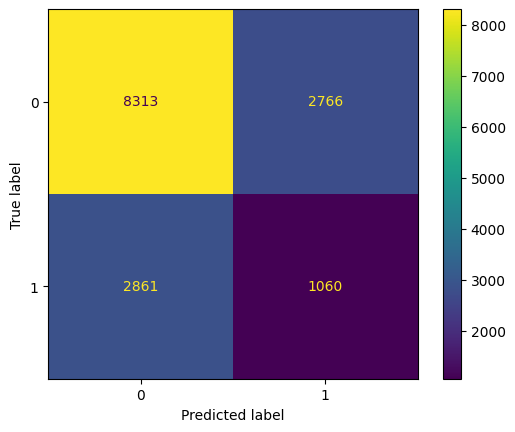

In [49]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

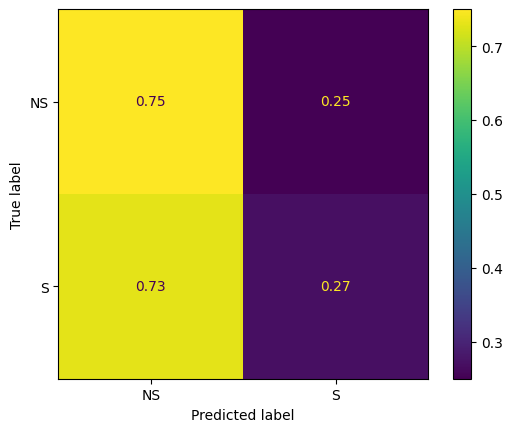

In [50]:
labels = [0,1]
label_names = ['NS', 'S']
cm = confusion_matrix( y_test, y_pred, labels = labels, normalize='true')
disp = ConfusionMatrixDisplay(cm, display_labels = label_names)
disp.plot()

Entao agora que temos uma analise incial do nosso modelo iremos aplicar as tecnicas de feature engenier para melhorar nosso modelo

In [51]:
#Vamos voltar a nossa base inicial e reinicar a analisa das colunas que devem ser removidas para que nosso modelo nao sofra da maldicao da dimensionalidade
df_clientes_rev = df_clientes
df_clientes_rev.head()

,ID_CLIENTE,TIPO_FUNCIONARIO,DIA_PAGAMENTO,TIPO_ENVIO_APLICACAO,QUANT_CARTOES_ADICIONAIS,TIPO_ENDERECO_POSTAL,SEXO,ESTADO_CIVIL,QUANT_DEPENDENTES,NIVEL_EDUCACIONAL,...,FLAG_DOCUMENTO_RESIDENCIAL,FLAG_RG,FLAG_CPF,FLAG_COMPROVANTE_RENDA,PRODUTO,FLAG_REGISTRO_ACSP,IDADE,CEP_RESIDENCIAL_3,CEP_PROFISSIONAL_3,ROTULO_ALVO_MAU=1
0,1,C,5,Web,0,1,F,6,1,0,...,0,0,0,0,1,N,32,595,595,1
1,2,C,15,Carga,0,1,F,2,0,0,...,0,0,0,0,1,N,34,230,230,1
2,3,C,5,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,27,591,591,0
3,4,C,20,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,61,545,545,0
4,5,C,10,Web,0,1,M,2,0,0,...,0,0,0,0,1,N,48,235,235,1


In [52]:
df_clientes_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 54 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID_CLIENTE                         50000 non-null  int64  
 1   TIPO_FUNCIONARIO                   50000 non-null  object 
 2   DIA_PAGAMENTO                      50000 non-null  int64  
 3   TIPO_ENVIO_APLICACAO               50000 non-null  object 
 4   QUANT_CARTOES_ADICIONAIS           50000 non-null  int64  
 5   TIPO_ENDERECO_POSTAL               50000 non-null  int64  
 6   SEXO                               50000 non-null  object 
 7   ESTADO_CIVIL                       50000 non-null  int64  
 8   QUANT_DEPENDENTES                  50000 non-null  int64  
 9   NIVEL_EDUCACIONAL                  50000 non-null  int64  
 10  ESTADO_NASCIMENTO                  50000 non-null  object 
 11  CIDADE_NASCIMENTO                  50000 non-null  obj

In [53]:
#Removendo as features que nao sao relevantes para o modelo
df_clientes_rev = df_clientes
df_clientes_rev = df_clientes_rev.drop(['ID_CLIENTE'],axis=1) #ID Sequencial nao e interessante ao modelo
df_clientes_rev = df_clientes_rev.drop(['TIPO_FUNCIONARIO'],axis=1) #Todos os registros tem o mesmo valor C nao e interessante ao modelo
df_clientes_rev = df_clientes_rev.drop(['TIPO_ENVIO_APLICACAO'],axis=1) #Nao a descricao para essa variavel e nao e interessante ao modelo
df_clientes_rev = df_clientes_rev.drop(['TIPO_ENDERECO_POSTAL'],axis=1) #Vou considerar qualquer informarcao sobre a localizacao do cliente inutil para o modelo
df_clientes_rev = df_clientes_rev.drop(['FLAG_TELEFONE_RESIDENCIAL'],axis=1) #Vou considerar qualquer informarcao sobre a localizacao do cliente inutil para o modelo
df_clientes_rev = df_clientes_rev.drop(['CODIGO_AREA_TELEFONE_RESIDENCIAL'],axis=1) #Vou considerar qualquer informarcao sobre a localizacao do cliente inutil para o modelo
df_clientes_rev = df_clientes_rev.drop(['ESTADO_RESIDENCIAL'],axis=1) #Vou considerar qualquer informarcao sobre a localizacao do cliente inutil para o modelo
df_clientes_rev = df_clientes_rev.drop(['CIDADE_RESIDENCIAL'],axis=1) #Vou considerar qualquer informarcao sobre a localizacao do cliente inutil para o modelo
df_clientes_rev = df_clientes_rev.drop(['BAIRRO_RESIDENCIAL'],axis=1) #Vou considerar qualquer informarcao sobre a localizacao do cliente inutil para o modelo
df_clientes_rev = df_clientes_rev.drop(['ESTADO_PROFISSIONAL'],axis=1) #Vou considerar qualquer informarcao sobre a localizacao do cliente inutil para o modelo
df_clientes_rev = df_clientes_rev.drop(['CIDADE_PROFISSIONAL'],axis=1) #Vou considerar qualquer informarcao sobre a localizacao do cliente inutil para o modelo
df_clientes_rev = df_clientes_rev.drop(['BAIRRO_PROFISSIONAL'],axis=1) #Vou considerar qualquer informarcao sobre a localizacao do cliente inutil para o modelo
df_clientes_rev = df_clientes_rev.drop(['FLAG_TELEFONE_PROFISSIONAL'],axis=1) #Vou considerar qualquer informarcao sobre a localizacao do cliente inutil para o modelo
df_clientes_rev = df_clientes_rev.drop(['CODIGO_AREA_TELEFONE_PROFISSIONAL'],axis=1) #Vou considerar qualquer informarcao sobre a localizacao do cliente inutil para o modelo
df_clientes_rev = df_clientes_rev.drop(['CEP_RESIDENCIAL_3'],axis=1) #Vou considerar qualquer informarcao sobre a localizacao do cliente inutil para o modelo
df_clientes_rev = df_clientes_rev.drop(['CEP_PROFISSIONAL_3'],axis=1) #Vou considerar qualquer informarcao sobre a localizacao do cliente inutil para o modelo
df_clientes_rev = df_clientes_rev.drop(['EMPRESA'],axis=1) #Nome da empresa nao e um item classificavel para avaliar se o cliente pode se tornar inadimplente estou desconsiderando para o modelo
df_clientes_rev = df_clientes_rev.drop(['CODIGO_PROFISSAO_CONJUGE'],axis=1) #Informacoes do conjuge tambem consideramos inutil para o modelo
df_clientes_rev = df_clientes_rev.drop(['NIVEL_EDUCACIONAL_CONJUGE'],axis=1)  #Informacoes do conjuge tambem consideramos inutil para o modelo
df_clientes_rev = df_clientes_rev.drop(['ESTADO_NASCIMENTO'],axis=1)  #Informacoes de localizacao nao agragam ao nosso modelo vamos desconsideralas
df_clientes_rev = df_clientes_rev.drop(['CIDADE_NASCIMENTO'],axis=1)  #Informacoes de localizacao nao agragam ao nosso modelo vamos desconsideralas
df_clientes_rev = df_clientes_rev.drop(['FLAG_TELEFONE_MOVEL'],axis=1)  #Contem apenas uma informacao entao vamos remover

In [54]:
#Vamos aplicar a funcao na nossa base revisada
df_clientes_rev['MESES_RESIDENCIA'] = df_clientes_rev[['MESES_RESIDENCIA','TIPO_RESIDENCIA']].apply(mres_approx,axis=1)
#Vamos aplicar a funcao na nossa base revisada
df_clientes_rev['TIPO_RESIDENCIA'] = df_clientes_rev[['IDADE','TIPO_RESIDENCIA']].apply(tres_approx,axis=1)


In [55]:
#Vamos verificar os tipos e os nulos novamente
df_clientes_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   DIA_PAGAMENTO                     50000 non-null  int64  
 1   QUANT_CARTOES_ADICIONAIS          50000 non-null  int64  
 2   SEXO                              50000 non-null  object 
 3   ESTADO_CIVIL                      50000 non-null  int64  
 4   QUANT_DEPENDENTES                 50000 non-null  int64  
 5   NIVEL_EDUCACIONAL                 50000 non-null  int64  
 6   NACIONALIDADE                     50000 non-null  int64  
 7   TIPO_RESIDENCIA                   50000 non-null  float64
 8   MESES_RESIDENCIA                  50000 non-null  float64
 9   FLAG_EMAIL                        50000 non-null  int64  
 10  RENDA_PESSOAL_MENSAL              50000 non-null  float64
 11  OUTRAS_RENDAS                     50000 non-null  float64
 12  FLAG

In [56]:
#Vamos analisar a coluna codigo da profissao
df_clientes_rev.CODIGO_PROFISSAO.unique()

array([ 9., 11., nan,  0.,  2., 13.,  7., 12.,  6., 16.,  8., 10., 15.,
       17.,  3.,  4.,  5., 18., 14.,  1.])

In [57]:
#Vamos analisar a coluna codigo da profissao
df_clientes_rev.TIPO_OCUPACAO.unique()

array([ 4., nan,  5.,  2.,  1.,  0.,  3.])

In [58]:
#Acredito que os nulos no codigo da profissao seja alguma profissao nao catalogada ou o cliente nao informou entao criarei um codigo ficticio para elas
df_clientes_rev.CODIGO_PROFISSAO = df_clientes_rev.CODIGO_PROFISSAO.fillna(99)
df_clientes_rev.CODIGO_PROFISSAO.unique()

array([ 9., 11., 99.,  0.,  2., 13.,  7., 12.,  6., 16.,  8., 10., 15.,
       17.,  3.,  4.,  5., 18., 14.,  1.])

Acredito que a ocupacao seja relevante para o modelo vamos tambem completar com um codigo ficticio para os itens nao informados

In [59]:
df_clientes_rev.TIPO_OCUPACAO = df_clientes_rev.TIPO_OCUPACAO.fillna(99)
df_clientes_rev.TIPO_OCUPACAO.unique()

array([ 4., 99.,  5.,  2.,  1.,  0.,  3.])

In [60]:
#Vamos verificar os tipos e os nulos novamente
df_clientes_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   DIA_PAGAMENTO                     50000 non-null  int64  
 1   QUANT_CARTOES_ADICIONAIS          50000 non-null  int64  
 2   SEXO                              50000 non-null  object 
 3   ESTADO_CIVIL                      50000 non-null  int64  
 4   QUANT_DEPENDENTES                 50000 non-null  int64  
 5   NIVEL_EDUCACIONAL                 50000 non-null  int64  
 6   NACIONALIDADE                     50000 non-null  int64  
 7   TIPO_RESIDENCIA                   50000 non-null  float64
 8   MESES_RESIDENCIA                  50000 non-null  float64
 9   FLAG_EMAIL                        50000 non-null  int64  
 10  RENDA_PESSOAL_MENSAL              50000 non-null  float64
 11  OUTRAS_RENDAS                     50000 non-null  float64
 12  FLAG

Vamos dumieficar as variaveis object da nossa base

In [61]:
sex = pd.get_dummies(df_clientes_rev.SEXO,drop_first=True)
flagregacsp = pd.get_dummies(df_clientes_rev.FLAG_REGISTRO_ACSP,drop_first=False)

In [62]:
#Agora vamos remover as colunas originais
df_clientes_rev = df_clientes_rev.drop(['SEXO'],axis=1)
df_clientes_rev = df_clientes_rev.drop(['FLAG_REGISTRO_ACSP'],axis=1)

In [63]:
#Agora vamos concatenar as dummies
df_clientes_rev_dmy = pd.concat([sex,flagregacsp,df_clientes_rev],axis = 1)
df_clientes_rev_dmy.head()

,F,M,N,N,DIA_PAGAMENTO,QUANT_CARTOES_ADICIONAIS,ESTADO_CIVIL,QUANT_DEPENDENTES,NIVEL_EDUCACIONAL,NACIONALIDADE,...,MESES_NO_TRABALHO,CODIGO_PROFISSAO,TIPO_OCUPACAO,FLAG_DOCUMENTO_RESIDENCIAL,FLAG_RG,FLAG_CPF,FLAG_COMPROVANTE_RENDA,PRODUTO,IDADE,ROTULO_ALVO_MAU=1
0,1,0,0,1,5,0,6,1,0,1,...,0,9.0,4.0,0,0,0,0,1,32,1
1,1,0,0,1,15,0,2,0,0,1,...,0,11.0,4.0,0,0,0,0,1,34,1
2,1,0,0,1,5,0,2,0,0,1,...,0,11.0,99.0,0,0,0,0,1,27,0
3,1,0,0,1,20,0,2,0,0,1,...,0,99.0,99.0,0,0,0,0,1,61,0
4,0,1,0,1,10,0,2,0,0,1,...,0,9.0,5.0,0,0,0,0,1,48,1


In [64]:
df_clientes_rev_dmy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   F                                 50000 non-null  uint8  
 1   M                                 50000 non-null  uint8  
 2   N                                 50000 non-null  uint8  
 3   N                                 50000 non-null  uint8  
 4   DIA_PAGAMENTO                     50000 non-null  int64  
 5   QUANT_CARTOES_ADICIONAIS          50000 non-null  int64  
 6   ESTADO_CIVIL                      50000 non-null  int64  
 7   QUANT_DEPENDENTES                 50000 non-null  int64  
 8   NIVEL_EDUCACIONAL                 50000 non-null  int64  
 9   NACIONALIDADE                     50000 non-null  int64  
 10  TIPO_RESIDENCIA                   50000 non-null  float64
 11  MESES_RESIDENCIA                  50000 non-null  float64
 12  FLAG

Agora apos o novo tratamento vamos rodar o modelo KNN novamente para verificar a precisao

In [65]:
#Vamos separar nossa base tratada em treino e teste
X = df_clientes_rev_dmy.iloc[:, :-1]
y = df_clientes_rev_dmy.iloc[:, -1]

In [66]:
X

,F,M,N,N,DIA_PAGAMENTO,QUANT_CARTOES_ADICIONAIS,ESTADO_CIVIL,QUANT_DEPENDENTES,NIVEL_EDUCACIONAL,NACIONALIDADE,...,QUANT_CARROS,MESES_NO_TRABALHO,CODIGO_PROFISSAO,TIPO_OCUPACAO,FLAG_DOCUMENTO_RESIDENCIAL,FLAG_RG,FLAG_CPF,FLAG_COMPROVANTE_RENDA,PRODUTO,IDADE
0,1,0,0,1,5,0,6,1,0,1,...,0,0,9.0,4.0,0,0,0,0,1,32
1,1,0,0,1,15,0,2,0,0,1,...,0,0,11.0,4.0,0,0,0,0,1,34
2,1,0,0,1,5,0,2,0,0,1,...,0,0,11.0,99.0,0,0,0,0,1,27
3,1,0,0,1,20,0,2,0,0,1,...,0,0,99.0,99.0,0,0,0,0,1,61
4,0,1,0,1,10,0,2,0,0,1,...,0,0,9.0,5.0,0,0,0,0,1,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,0,0,1,10,0,1,2,0,1,...,1,0,9.0,4.0,0,0,0,0,1,36
49996,1,0,0,1,25,0,1,0,0,1,...,0,0,99.0,99.0,0,0,0,0,2,21
49997,0,1,0,1,5,0,2,3,0,1,...,0,0,9.0,2.0,0,0,0,0,1,41
49998,1,0,0,1,1,0,1,1,0,1,...,0,0,9.0,2.0,0,0,0,0,1,28


In [67]:
y

0        1
1        1
2        0
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    1
49999    0
Name: ROTULO_ALVO_MAU=1, Length: 50000, dtype: int64

Vamos agora aplicar a tecnica de PCA para identificar as principais variaveis para o modelo

In [174]:
from sklearn.decomposition import PCA

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Criando uma instância do PCA e especificando o número de componentes desejados
pca = PCA(n_components=2)

# Aplicando o PCA aos dados
X_pca = pca.fit_transform(X_scaled)

# Criando um DataFrame pandas para visualização
df = pd.DataFrame(X_pca,columns=['PC1','PC2'])
df['Target'] = y

# Visualizando o resultado
print(df.head())

        PC1       PC2  Target
0 -1.184573 -1.206721       1
1 -1.422707 -1.160532       1
2 -1.406483 -1.045234       0
3 -1.378620 -1.300371       0
4 -1.388227  1.758783       1


In [175]:
#Agora vamos analisar o resultado
# Verificar a variância explicada por cada componente principal
print("Variância explicada por cada componente principal:", pca.explained_variance_ratio_)

Variância explicada por cada componente principal: [0.17867165 0.1060973 ]


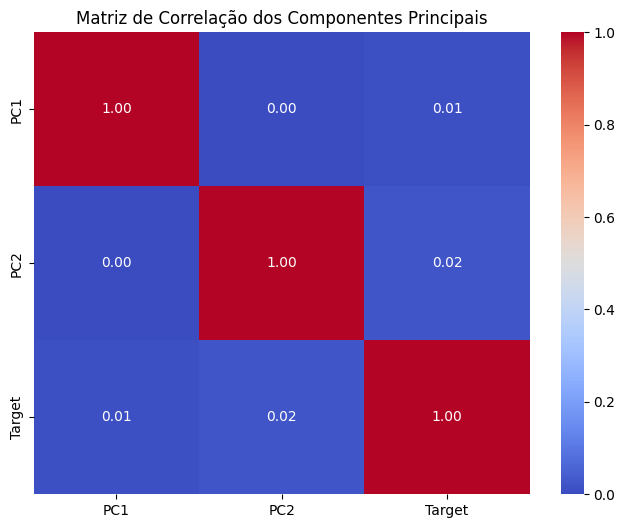

In [176]:
# Visualizar a matriz de correlação dos componentes principais
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação dos Componentes Principais')
plt.show()

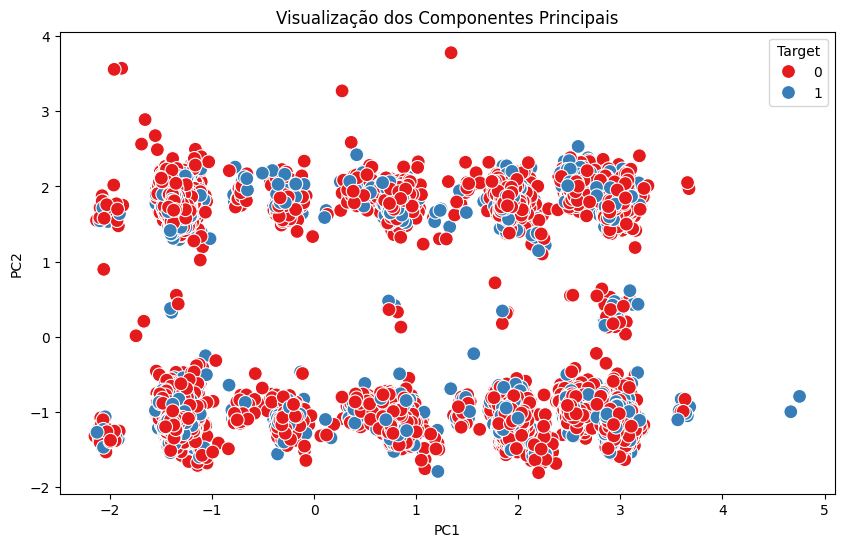

In [177]:
# Visualizar os componentes principais
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Target', palette='Set1', s=100)
plt.title('Visualização dos Componentes Principais')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()



In [178]:
# Determinar as variáveis mais relevantes nos componentes principais
df_components = pd.DataFrame(pca.components_, columns=X.columns, index=['PC1', 'PC2'])
print("\nPesos das variáveis nos componentes principais:")
print(df_components)


Pesos das variáveis nos componentes principais:
            F         M    N         N  DIA_PAGAMENTO  \
PC1 -0.001626 -0.000245  0.0 -0.017010       0.009097   
PC2 -0.700567  0.700560 -0.0 -0.070073      -0.062058   

     QUANT_CARTOES_ADICIONAIS  ESTADO_CIVIL  QUANT_DEPENDENTES  \
PC1                  0.021052     -0.133772          -0.019144   
PC2                  0.066222     -0.025856           0.051222   

     NIVEL_EDUCACIONAL  NACIONALIDADE  TIPO_RESIDENCIA  MESES_RESIDENCIA  \
PC1          -0.413098       0.018444         0.033039          0.000687   
PC2           0.010569       0.014589        -0.020717         -0.008312   

     FLAG_EMAIL  RENDA_PESSOAL_MENSAL  OUTRAS_RENDAS  FLAG_VISA  \
PC1    0.000783              0.012835       0.522561   0.522561   
PC2    0.012424             -0.016993      -0.001550  -0.001550   

     FLAG_MASTERCARD  FLAG_DINERS  FLAG_AMERICAN_EXPRESS  FLAG_OUTROS_CARTOES  
PC1         0.511576    -0.007232               0.019061             

Vamos agora aplicar o RFE para selecionar as melhores variaveis

In [182]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Inicializar o estimador do modelo que você deseja usar para seleção de características
modelo = LogisticRegression()

# Inicializar o RFE com o estimador e o número desejado de características a serem selecionadas
seletor = RFE(estimator=modelo, n_features_to_select=33, step=1)

# Aplicar o RFE aos dados
seletor = seletor.fit(X, y)

# Exibir as características selecionadas
print("Características selecionadas:")
for i in range(len(seletor.support_)):
    if seletor.support_[i]:
        print(f"Característica {i+1}")

# Exibir o ranking das características
print("\nRanking das características:")
print(seletor.ranking_)

Características selecionadas:
Característica 1
Característica 2
Característica 3
Característica 4
Característica 5
Característica 6
Característica 7
Característica 8
Característica 9
Característica 10
Característica 11
Característica 12
Característica 13
Característica 14
Característica 15
Característica 16
Característica 17
Característica 18
Característica 19
Característica 20

Ranking das características:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Agora iremos montar a base com as variaveis selecionadas

In [239]:
# Filtrar as características selecionadas
X_selecionado = seletor.transform(X)

# Converter para DataFrame pandas (opcional)
df_cliente_selecionado = pd.DataFrame(X_selecionado, columns=[X.columns[i] for i in range(X_selecionado.shape[1])])
X_selecionado = pd.DataFrame(X_selecionado, columns=[X.columns[i] for i in range(X_selecionado.shape[1])])

# Adicionar a variável de saída se necessário
df_cliente_selecionado['Target'] = y

# Exibir o DataFrame resultante
print(df_cliente_selecionado.head())
print(X_selecionado.head())

     F    M    N     N  DIA_PAGAMENTO  QUANT_CARTOES_ADICIONAIS  ESTADO_CIVIL  \
0  1.0  0.0  1.0   5.0            6.0                       1.0           1.0   
1  1.0  0.0  1.0  15.0            2.0                       0.0           1.0   
2  1.0  0.0  1.0   5.0            2.0                       0.0           1.0   
3  1.0  0.0  1.0  20.0            2.0                       0.0           1.0   
4  0.0  1.0  1.0  10.0            2.0                       0.0           1.0   

   QUANT_DEPENDENTES  NIVEL_EDUCACIONAL  NACIONALIDADE  ...  MESES_RESIDENCIA  \
0                1.0                1.0            1.0  ...               0.0   
1                1.0                1.0            0.0  ...               0.0   
2                1.0                1.0            0.0  ...               0.0   
3                0.0                1.0            0.0  ...               0.0   
4                1.0                1.0            0.0  ...               0.0   

   FLAG_EMAIL  RENDA_PESSO

Agora com as melhores 20 variaveis selecionadas vamos aplicar no modelo

In [184]:
#Vamos separar nossa base tratada em treino e teste
X = df_cliente_selecionado.iloc[:, :-1]
y = df_cliente_selecionado.iloc[:, -1]

In [185]:
#Agora vamos dividir em treino e teste (teste com 30%)
X_train,X_teste,y_train,y_test = train_test_split(X,y,test_size = .3, random_state = 25)

In [186]:
#Vamos criar o modelo knn
Classif_KNN = KNeighborsClassifier(n_neighbors=1)

In [187]:
#Vamos treinar novamente o modelo
Classif_KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [188]:
#Agora predizer novamente com nossos dados de teste
y_pred = Classif_KNN.predict(X_teste)

In [189]:
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [190]:
y_test

13920    0
23439    0
11851    1
8278     1
31258    1
        ..
31994    0
4715     0
38700    1
49995    1
24859    1
Name: Target, Length: 15000, dtype: int64

Agora vamos avaliar novamente o modelo com as variaveis ajustadas

In [191]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75     11079
           1       0.29      0.28      0.29      3921

    accuracy                           0.63     15000
   macro avg       0.52      0.52      0.52     15000
weighted avg       0.63      0.63      0.63     15000

0.6291333333333333


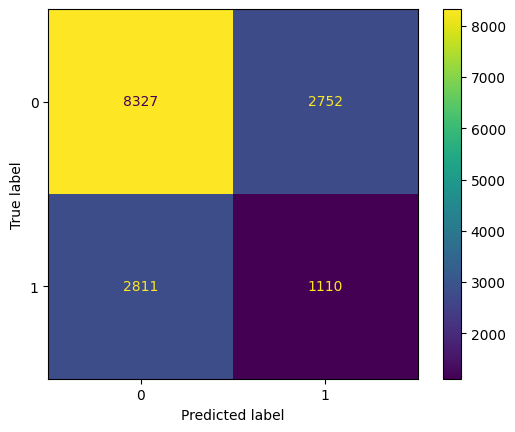

In [192]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

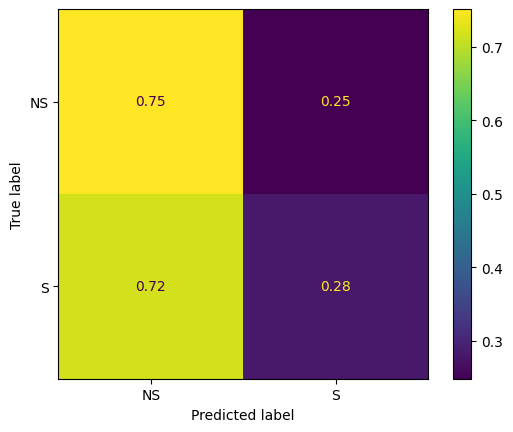

In [193]:
labels = [0,1]
label_names = ['NS', 'S']
cm = confusion_matrix( y_test, y_pred, labels = labels, normalize='true')
disp = ConfusionMatrixDisplay(cm, display_labels = label_names)
disp.plot()

A principio obtivemos uma piora na acuracia do nosso modelo, vamos entao avaliar qual o numero de K e o ideal para nossa base

In [195]:
#Vamos testar do K1 ate K36
k_range = range(1, 36)
scores = []

for k in k_range:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 25)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

[0.6291333333333333, 0.7087333333333333, 0.6647333333333333, 0.7113333333333334, 0.6855333333333333, 0.7192666666666667, 0.6991333333333334, 0.7238, 0.712, 0.7255333333333334, 0.7182, 0.7277333333333333, 0.7244, 0.7322, 0.7262, 0.7332, 0.7277333333333333, 0.7332, 0.7303333333333333, 0.7335333333333334, 0.7327333333333333, 0.7342, 0.7340666666666666, 0.7349333333333333, 0.7336, 0.7348666666666667, 0.734, 0.7352666666666666, 0.7346, 0.7370666666666666, 0.7355333333333334, 0.7372, 0.7358666666666667, 0.7366666666666667, 0.7358666666666667]


Text(0, 0.5, 'Testing Accuracy')

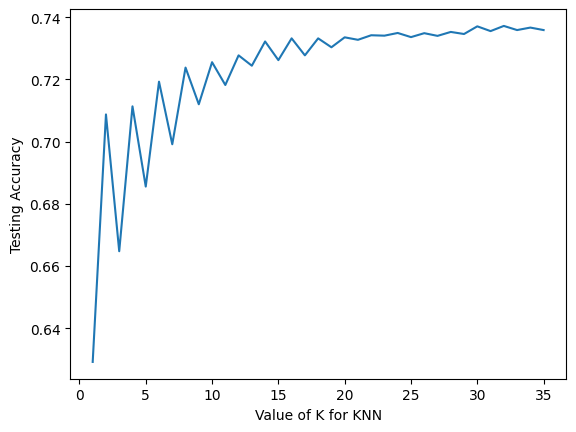

In [196]:
#Vamos exibir os resultados
print(scores)
#Plota os valores de acc. em função do valor escolhido de K
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [197]:
max(scores)

0.7372

In [198]:
scores.index(max(scores))

31

Analisando os resultados identificamos que a melhor acuracia para nosso modelo seria utilizando o fit com numero de K de 30 vamos entao retreinar nosso modelo

In [200]:
#Avaliando a melhor configuração de KNN
best_KNN = KNeighborsClassifier(n_neighbors=31)
best_KNN.fit(X_train, y_train)
y_pred = best_KNN.predict(X_test)

In [201]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.99      0.85     11079
           1       0.34      0.01      0.03      3921

    accuracy                           0.74     15000
   macro avg       0.54      0.50      0.44     15000
weighted avg       0.64      0.74      0.63     15000

0.7355333333333334


Com o K ajustado melhoramos nossa acuracia de 61% para 74% vamos continuar a analise para tentarmos aumentar esse percentual

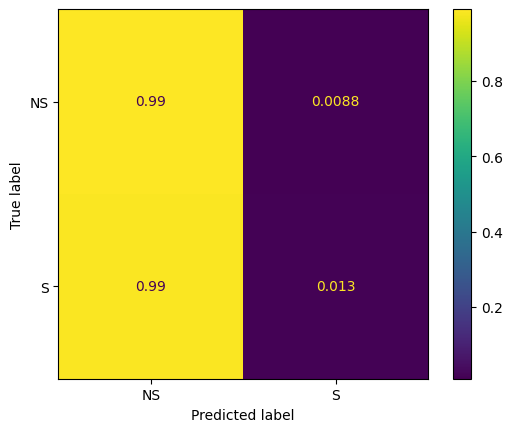

In [202]:
#Vamos exibir a matriz de confusao do nosso melhor modelo
cm = confusion_matrix( y_test, y_pred, labels = labels, normalize='true')
disp = ConfusionMatrixDisplay(cm, display_labels = label_names)
disp.plot()

Vamos agora aplicar a tecnica de Normalizacao dos dados na nossa base e realizar novamente o treinamento buscando aumentar a performance do modelo

In [203]:
#Vamos aplicar a normalizacao
scaler = MinMaxScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [204]:
#Treinanado novamente com os dados normalizados e com K 31
best_KNN = KNeighborsClassifier(n_neighbors=31)
best_KNN.fit(X_train, y_train)
y_pred = best_KNN.predict(X_test)

Vamos avaliar novamente o modelo

In [205]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.99      0.85     11079
           1       0.35      0.01      0.02      3921

    accuracy                           0.74     15000
   macro avg       0.55      0.50      0.44     15000
weighted avg       0.64      0.74      0.63     15000

0.7360666666666666


Nao houve um aumento significativo da acuracia apenas normalizando os dados vamos seguir com as tenicas buscando a melhora do modelo
Vamos aplicar entao a tecnica de selecao de caracteriscas

In [208]:
# Escolher e aplicar a técnica de seleção de características
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=20)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [2] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [209]:
#Treinanado novamente com os dados normalizados e com K 22
best_KNN = KNeighborsClassifier(n_neighbors=22)
best_KNN.fit(X_train_selected, y_train)
y_pred = best_KNN.predict(X_test_selected)

Vamos avaliar novamente o modelo

In [210]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.99      0.85     11079
           1       0.40      0.02      0.04      3921

    accuracy                           0.74     15000
   macro avg       0.57      0.50      0.44     15000
weighted avg       0.65      0.74      0.64     15000

0.7363333333333333


Nao houve um aumento especifico da acuracia
Quando analisamos a variavel alvo nos boxplots iniciais verificamos uma base desbalanciada entao vamos rebalancear a base e treinar o modelo novamente com Técnicas de Amostragem e Preprocessamento


In [294]:
#from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTE

# Aplicar o SMOTE para balancear as classes
smote = SMOTE(k_neighbors=5,random_state=25)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [295]:
#Vamos verificar o rebalanceamento
X_resampled = pd.DataFrame(X_resampled,columns=X_selecionado.columns)
X_resampled.head()


,F,M,N,N,DIA_PAGAMENTO,QUANT_CARTOES_ADICIONAIS,ESTADO_CIVIL,QUANT_DEPENDENTES,NIVEL_EDUCACIONAL,NACIONALIDADE,TIPO_RESIDENCIA,MESES_RESIDENCIA,FLAG_EMAIL,RENDA_PESSOAL_MENSAL,OUTRAS_RENDAS,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OUTROS_CARTOES
0,0.0,1.0,0.0,0.791667,0.285714,0.000000,0.5,0.2,1.0,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.0,0.0,0.0,0.35
1,1.0,0.0,0.0,0.000000,0.285714,0.000000,0.5,0.2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.22
2,0.0,1.0,0.0,0.375000,0.142857,0.000000,0.5,0.2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.45
3,1.0,0.0,0.0,0.000000,0.142857,0.133333,0.5,0.2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.35
4,0.0,1.0,0.0,0.375000,0.142857,0.000000,0.5,0.2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.27


In [296]:
#Vamos adicionar a variavel alvo
df_cliente_base_treino_rebal = X_resampled
df_cliente_base_treino_rebal['Target'] = y_resampled
df_cliente_base_treino_rebal.head()

,F,M,N,N,DIA_PAGAMENTO,QUANT_CARTOES_ADICIONAIS,ESTADO_CIVIL,QUANT_DEPENDENTES,NIVEL_EDUCACIONAL,NACIONALIDADE,...,MESES_RESIDENCIA,FLAG_EMAIL,RENDA_PESSOAL_MENSAL,OUTRAS_RENDAS,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OUTROS_CARTOES,Target
0,0.0,1.0,0.0,0.791667,0.285714,0.000000,0.5,0.2,1.0,0.0,...,0.0,0.0,0.0,0.5,0.5,0.0,0.0,0.0,0.35,0
1,1.0,0.0,0.0,0.000000,0.285714,0.000000,0.5,0.2,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.22,0
2,0.0,1.0,0.0,0.375000,0.142857,0.000000,0.5,0.2,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.45,0
3,1.0,0.0,0.0,0.000000,0.142857,0.133333,0.5,0.2,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.35,0
4,0.0,1.0,0.0,0.375000,0.142857,0.000000,0.5,0.2,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.27,0


In [297]:
#Confirmado se nao existem nulos na base
df_cliente_base_treino_rebal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51760 entries, 0 to 51759
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   F                         51760 non-null  float64
 1   M                         51760 non-null  float64
 2   N                         51760 non-null  float64
 3   N                         51760 non-null  float64
 4   DIA_PAGAMENTO             51760 non-null  float64
 5   QUANT_CARTOES_ADICIONAIS  51760 non-null  float64
 6   ESTADO_CIVIL              51760 non-null  float64
 7   QUANT_DEPENDENTES         51760 non-null  float64
 8   NIVEL_EDUCACIONAL         51760 non-null  float64
 9   NACIONALIDADE             51760 non-null  float64
 10  TIPO_RESIDENCIA           51760 non-null  float64
 11  MESES_RESIDENCIA          51760 non-null  float64
 12  FLAG_EMAIL                51760 non-null  float64
 13  RENDA_PESSOAL_MENSAL      51760 non-null  float64
 14  OUTRAS

<ipython-input-298-9cef384032fd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Target',data=df_cliente_base_treino_rebal,palette='hls')


<Axes: xlabel='Target', ylabel='count'>

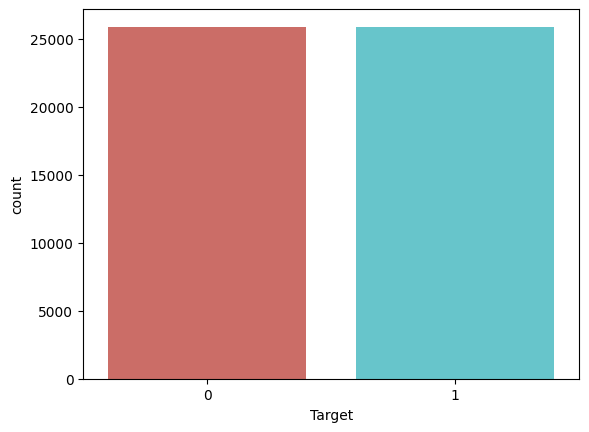

In [298]:
#Vamos plotar um contplot para verificar se a variavel e binaria e sua distribuicao
sns.countplot(x='Target',data=df_cliente_base_treino_rebal,palette='hls')

In [299]:
#Vamos separar nossa base tratada em treino e teste
X = df_cliente_base_treino_rebal.iloc[:, :-1]
y = df_cliente_base_treino_rebal.iloc[:, -1]


In [300]:
X

,F,M,N,N,DIA_PAGAMENTO,QUANT_CARTOES_ADICIONAIS,ESTADO_CIVIL,QUANT_DEPENDENTES,NIVEL_EDUCACIONAL,NACIONALIDADE,TIPO_RESIDENCIA,MESES_RESIDENCIA,FLAG_EMAIL,RENDA_PESSOAL_MENSAL,OUTRAS_RENDAS,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OUTROS_CARTOES
0,0.0,1.0,0.0,0.791667,0.285714,0.000000,0.5,0.200000,1.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.500000,0.0,0.0,0.0,0.350000
1,1.0,0.0,0.0,0.000000,0.285714,0.000000,0.5,0.200000,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.220000
2,0.0,1.0,0.0,0.375000,0.142857,0.000000,0.5,0.200000,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.450000
3,1.0,0.0,0.0,0.000000,0.142857,0.133333,0.5,0.200000,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.350000
4,0.0,1.0,0.0,0.375000,0.142857,0.000000,0.5,0.200000,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.270000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51755,1.0,0.0,0.0,0.166667,0.142857,0.000000,0.0,0.200000,1.0,1.0,1.0,0.0,0.0,0.0,0.495851,0.495851,1.0,0.0,0.0,0.209751
51756,1.0,0.0,0.0,0.583333,0.285714,0.005572,0.5,0.383284,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.276657
51757,1.0,0.0,0.0,0.375000,0.185120,0.059168,0.5,0.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.500000,1.0,0.0,1.0,0.357751
51758,1.0,0.0,0.0,0.375000,0.142857,0.000000,0.5,0.200000,1.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.500000,1.0,0.0,0.0,0.542860


In [301]:
y

0        0
1        0
2        0
3        0
4        0
        ..
51755    1
51756    1
51757    1
51758    1
51759    1
Name: Target, Length: 51760, dtype: int64

In [302]:
# Dividir os dados rebalanceados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

In [303]:
#Vamos aplicar a normalizacao
scaler = MinMaxScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Agora que temos uma base de treino rebalanceada vamos executar nosso KNN com o numero de K ajustado para a melhor performace e avaliar os resultados

In [304]:
#Treinanado novamente com os dados normalizados e com K 31
best_KNN = KNeighborsClassifier(n_neighbors=31)
best_KNN.fit(X_train, y_train)
y_pred = best_KNN.predict(X_test)

Vamos novamente avaliar a acuracia do modelo

In [305]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.54      0.57      5194
           1       0.58      0.65      0.61      5158

    accuracy                           0.59     10352
   macro avg       0.60      0.59      0.59     10352
weighted avg       0.60      0.59      0.59     10352

0.5941846986089645


Ao aplicarmos o KNN na base reabalanceada nao obtivemos uma melhora no modelo por provel overfit da base, vamos voltar ao dados apos a reducao de dimensionalidade e aplicar a tecnica de distancia ponderada

In [307]:
#Vamos separar nossa base tratada em treino e teste
X = df_cliente_selecionado.iloc[:, :-1]
y = df_cliente_selecionado.iloc[:, -1]

In [308]:
# Dividir os dados rebalanceados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

In [309]:
#Vamos aplicar a normalizacao
scaler = MinMaxScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [310]:
#Avaliando a melhor configuração de KNN
best_KNN = KNeighborsClassifier(n_neighbors=31)
best_KNN.fit(X_train, y_train)
y_pred = best_KNN.predict(X_test)

In [311]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.99      0.85      7388
           1       0.42      0.02      0.03      2612

    accuracy                           0.74     10000
   macro avg       0.58      0.50      0.44     10000
weighted avg       0.66      0.74      0.64     10000

0.7371


Agora vamos aplicar a tecnica de distancia ponderada e avaliar se obtivemos ganho no modelo

In [312]:
# Definir uma função de distância ponderada
def weighted_distance(x1, x2, weights):
    return np.sqrt(np.sum(weights * (x1 - x2)**2))

# Definir uma função de distância personalizada que utiliza a função de distância ponderada
def custom_distance(x1, x2, weights):
    return weighted_distance(x1, x2, weights)

In [ ]:
# Inicializar o classificador KNN com a função de distância personalizada
knn = KNeighborsClassifier(n_neighbors=31, metric=custom_distance, metric_params={'weights': np.array([1, 1, 1, 1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])})

# Treinar o modelo KNN
knn.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = knn.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

Vamo realizar a tecnica da validacao cruzada para realizarmos mais uma tentativa de melhoria no modelo

In [ ]:
# Inicializar o classificador KNN
knn = KNeighborsClassifier(n_neighbors=31)

# Realizar validação cruzada com 2 folds
scores = cross_val_score(knn, X, y, cv=2)

# Exibir os resultados da validação cruzada
print("Acurácia para cada fold:", scores)
print("Acurácia média:", scores.mean())